# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

## Context

![img](../data/diamonds.jpg)

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

In this lab we will first explore our dataset to better understand the data we have and then try to determine which characteristics of a diamond are more likely to influence its price.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them in the following week.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [22]:
#your code here

diamonds = pd.read_csv('../data/diamonds.csv', index_col = 0)

#the index column = 0 es para que no haga una columna extra poniendo unnamed

# 1. Taking the first look on the data.
Let's see how the data looks like by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [26]:
#your code here
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
#te da una sample random de diferentes rows 
diamonds.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
29728,0.31,Ideal,G,VVS2,61.8,56.0,707,4.31,4.36,2.68
6074,1.09,Premium,I,SI1,61.6,61.0,3968,6.64,6.57,4.07
41973,0.40,Ideal,D,VVS2,62.2,55.0,1263,4.72,4.74,2.94
35749,0.30,Premium,D,VS2,62.5,58.0,911,4.29,4.26,2.67
39628,0.35,Ideal,E,SI2,61.4,56.0,491,4.51,4.55,2.78
34625,0.31,Premium,E,VS2,61.0,58.0,872,4.39,4.37,2.67
1393,0.32,Ideal,E,SI1,61.9,55.0,559,4.40,4.43,2.73
10011,1.13,Ideal,G,SI2,60.8,56.0,4707,6.64,6.72,4.06
26274,1.70,Ideal,G,VS2,62.9,55.0,15756,7.66,7.60,4.80
35753,0.30,Premium,D,VS2,61.7,59.0,911,4.28,4.25,2.63


In [29]:
#te da las ultimas rows
diamonds.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


**What do you see? Do some comments about the values you see in each column, comparing with the codebook. Is that what you expected?**

In [6]:
#your code here

# Head gives us an overview butdoes not provides so much information

#### Check the total rows per columns:

In [30]:
#info gives us the total rows that we have in each columns (it does not counts the nulls)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice on our infrastracture.

**Check the shape of the data**

In [32]:
#your code here
# this is an attribute, this is way we don't call the method by using parenthesis

diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamonds experts, so we will create a new column with a new scale better understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [42]:
# Example of function zip:

for item in zip(clarity_unique_lst, range(len(clarity_unique_lst))):
    print(item)

('SI2', 0)
('SI1', 1)
('VS1', 2)
('VS2', 3)
('VVS2', 4)
('VVS1', 5)
('I1', 6)
('IF', 7)


In [35]:
#Method 1

clarity_unique_lst = ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [37]:
clarity_dict = {key : value for key, value in zip(clarity_unique_lst, range(len(clarity_unique_lst)))}

In [38]:
clarity_dict

{'I1': 6,
 'IF': 7,
 'SI1': 1,
 'SI2': 0,
 'VS1': 2,
 'VS2': 3,
 'VVS1': 5,
 'VVS2': 4}

In [45]:
#Method 2:

clarity_dict1 = dict(zip(clarity_unique_lst, range(len(clarity_unique_lst))))

In [47]:
clarity_dict1

{'I1': 6,
 'IF': 7,
 'SI1': 1,
 'SI2': 0,
 'VS1': 2,
 'VS2': 3,
 'VVS1': 5,
 'VVS2': 4}

In [48]:
#Method1
diamonds['clarity'].replace(clarity_dict, inplace = True)

In [50]:
#method2

#es normal que de error pq en el otro hemos puesto inplace

#diamonds.replace({'clarity':clarity_dict}, inplace=True)

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [56]:
diamonds.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
color_lst = dict(zip()) 



With the `info` method, we can see the features of the dataset, the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment what you see**

In [51]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null int64
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 4.5+ MB


**Check the types of each column and comment if it matches with the expected**

In [52]:
#your code here
diamonds.dtypes

carat      float64
cut         object
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics and take further steps, if needed.

**Use the `describe` method and comment what you see**

In [53]:
#your code and comments here

diamonds.describe()

#here we see that x y and z (shape of the diamond) is = 0 for the min row, so it does not make sense 
# because its not possible to have a diamond with no shape

,carat,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [64]:
#your code here

#query is faster

diamonds_filtered = diamonds.query('x == 0 or y ==0 or z == 0').copy()
diamonds_filtered

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,0,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,6,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,0,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,0,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,6,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,0,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,3,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,3,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,2,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,0,59.4,61.0,12631,8.49,8.45,0.0


In [60]:
# we are going to try to find the z because we know how to get it, we have a formula for that:
# Z = depth(x+y)/2*100
# vamos a definir una función con la fórmula para despues pasarle cada row

def calculate_z(row):
    return row.depth * (row.x + row.y) / (2*100)

In [65]:
# no podemos usar diamonds_filtered.z.apply pq sino no nos va a dejar acceder a las otras columns 
# por eso seleccionamos todo el dataframe y luego dentro de la funcion ya especificamos qué columnas 
#axis = 1 porque necesitamos que vaya row by row

diamonds_filtered['z'] = diamonds_filtered.apply(calculate_z, axis=1)
diamonds_filtered.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,0,59.1,59.0,3142,6.55,6.48,3.850365
2315,1.01,Premium,H,6,58.1,59.0,3167,6.66,6.60,3.852030
4792,1.10,Premium,G,0,63.0,59.0,3696,6.50,6.47,4.085550
5472,1.01,Premium,F,0,59.2,58.0,3837,6.50,6.47,3.839120
10168,1.50,Good,G,6,64.0,61.0,4731,7.15,7.04,4.540800


In [55]:
# for the ones that x and y are 0, we can not use the formula, so we will drop those rows because they are not giving us any information

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [21]:
#your code here

#hecho arriba

**Apply it just to the rows with wrong values**

In [66]:
# replace all this information in the original dataframe:
# for use update 
# the dataframe has to be the same structure, same index and same columns to be able to do it.
# what it does is looking and comparing the info of the updating df and if it finds the same index 
# update the previous df with this information

diamonds.update(diamonds_filtered)

In [71]:
# as we can see, now just the column z where x and y are 0, are not updated
diamonds[diamonds['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11964,1.00,Very Good,H,3.0,63.3,53.0,5139.0,0.0,0.0,0.0
15952,1.14,Fair,G,2.0,57.5,67.0,6381.0,0.0,0.0,0.0
24521,1.56,Ideal,G,3.0,62.2,54.0,12800.0,0.0,0.0,0.0
26244,1.20,Premium,D,5.0,62.1,59.0,15686.0,0.0,0.0,0.0
27430,2.25,Premium,H,0.0,62.8,59.0,18034.0,0.0,0.0,0.0
49557,0.71,Good,F,0.0,64.1,60.0,2130.0,0.0,0.0,0.0
49558,0.71,Good,F,0.0,64.1,60.0,2130.0,0.0,0.0,0.0


In [73]:
# show us all the columns with x, y or z = 0
diamonds.query('x == 0 or y == 0 or z == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z
11183,1.07,Ideal,F,0.0,61.6,56.0,4954.0,0.0,6.62,2.03896
11964,1.00,Very Good,H,3.0,63.3,53.0,5139.0,0.0,0.00,0.00000
15952,1.14,Fair,G,2.0,57.5,67.0,6381.0,0.0,0.00,0.00000
24521,1.56,Ideal,G,3.0,62.2,54.0,12800.0,0.0,0.00,0.00000
26244,1.20,Premium,D,5.0,62.1,59.0,15686.0,0.0,0.00,0.00000
27430,2.25,Premium,H,0.0,62.8,59.0,18034.0,0.0,0.00,0.00000
49557,0.71,Good,F,0.0,64.1,60.0,2130.0,0.0,0.00,0.00000
49558,0.71,Good,F,0.0,64.1,60.0,2130.0,0.0,0.00,0.00000


In [ ]:
# if we don't have the dimentions, we will replace all this for NaN:

**Replace the zero values in the `z` column for a NaN**

In [78]:
#your code here
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [81]:
cols = ['x','y','z']
diamonds[cols] = diamonds[cols].replace(0, np.NaN)

In [83]:
diamonds.isnull().sum()
# now we have the NaN values and we can drop them

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          8
y          7
z          7
dtype: int64

In [88]:
diamonds.dropna(inplace = True)

In [89]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

----
# Bonus: let's check the new z values
Since with data we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [26]:
#your code here

Let's check the data again with the `describe()` method.

In [1]:
#your code here

**Check how many outliers do you have and comment what you would do with those values**

In [29]:
#your code here

# 3. Checking the outliers
Now we're going to revisit the summary table and check for outliers.

**Use the `describe` method again and comment the statistics, after that look if you have any outlier** 

In [90]:
#your code here
diamonds.describe()

,carat,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,2.256230,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265
std,0.473986,1.766517,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,1.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
#your comments here

# ahora ya no aparecen 0 en x, y y z
# pero vemos que en la columna y(Width) hay 58mm que es muy raro pq es muy grande asñi que vamos a ver si hay muchos 
# o es un caso aislado

In [98]:
# esto al final no lo usamos, pero lo dejo por si algun dia lo necesito: quantile76 = diamonds.y.quantile(0.90)
diamonds.loc[diamonds.y > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,0.0,58.9,57.0,12210.0,8.09,58.90,8.06
25999,4.01,Premium,I,6.0,61.0,61.0,15223.0,10.14,10.10,6.17
27416,5.01,Fair,J,6.0,65.5,59.0,18018.0,10.74,10.54,6.98
27631,4.50,Fair,J,6.0,65.8,58.0,18531.0,10.23,10.16,6.72
49190,0.51,Ideal,E,2.0,61.8,55.0,2075.0,5.15,31.80,5.12


In [102]:
# ejemplo para lo que viene a continuación:

a,b,c =[4,5,6]

In [104]:
a

4

In [105]:
b

5

In [109]:
c


6

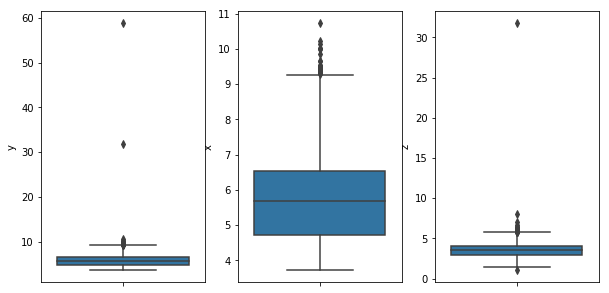

In [115]:
#your code here

# fig es el cuadrado onde dentro estaran los plots(siempre será uno), el marco
# ax es una lista of x's, número de cuadraditos con plots dentro del marco
# fig, ax = plt.subplots(1,3) esto es tuple unpacked. fig va a ser 1 ax , es lo mismo que esto: a,b,c =[4,5,6]

fig, ax = plt.subplots(1,3, figsize = (10,5)) # 1 row, 3 columns (tres cuadraditos), #figsize el tamaño que quiero que los cuadraditos sean
sns.boxplot(y = diamonds.y, ax = ax[0])
sns.boxplot(y = diamonds.x, ax = ax[1])
sns.boxplot(y=diamonds.z, ax = ax[2])
plt.show()


**Use a box plot to check for the outliers**

In [112]:
#your code here
diamonds.loc[diamonds.y > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,0.0,58.9,57.0,12210.0,8.09,58.90,8.06
25999,4.01,Premium,I,6.0,61.0,61.0,15223.0,10.14,10.10,6.17
27416,5.01,Fair,J,6.0,65.5,59.0,18018.0,10.74,10.54,6.98
27631,4.50,Fair,J,6.0,65.8,58.0,18531.0,10.23,10.16,6.72
49190,0.51,Ideal,E,2.0,61.8,55.0,2075.0,5.15,31.80,5.12


Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we now that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [113]:
#your code here
diamonds.loc[diamonds.z > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
48411,0.51,Very Good,E,2.0,61.8,54.7,1970.0,5.12,5.15,31.8


In [118]:
type(rows_to_drop)

pandas.core.frame.DataFrame

In [119]:
rows_to_drop = diamonds.loc[(diamonds.y > 11) | (diamonds.z > 11)].copy()
diamonds.drop(rows_to_drop.index)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,0.0,61.5,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,1.0,59.8,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,2.0,56.9,65.0,327.0,4.05,4.07,2.31
4,0.29,Premium,I,3.0,62.4,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,0.0,63.3,58.0,335.0,4.34,4.35,2.75
6,0.24,Very Good,J,4.0,62.8,57.0,336.0,3.94,3.96,2.48
7,0.24,Very Good,I,5.0,62.3,57.0,336.0,3.95,3.98,2.47
8,0.26,Very Good,H,1.0,61.9,55.0,337.0,4.07,4.11,2.53
9,0.22,Fair,E,3.0,65.1,61.0,337.0,3.87,3.78,2.49
10,0.23,Very Good,H,2.0,59.4,61.0,338.0,4.00,4.05,2.39


We're going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` to the row with the outlier**

In [40]:
#your code here

Let's check if we actually corrected the outlier.

In [ ]:
# your code here

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [43]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [48]:
#your code here

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [50]:
#your code here

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

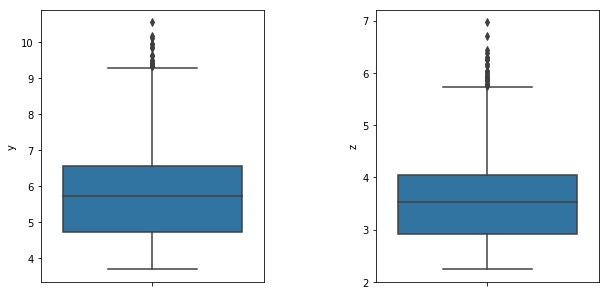

In [60]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think?**


In [61]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to another notebook to have a more organized way of working. Your new csv will be named ``diamonds_clean``**

In [62]:
#your code here

In [63]:
#Solution
diamonds.to_csv("../data/diamonds_clean.csv")